**Note: Data pre-processing**  
Procedures:  
&nbsp; 1): Read the dataset  
&nbsp; 2): Transform the tabular data into images  
&nbsp; 3): Display the transformed images  
&nbsp; 4): Split the training and test set  

In [ ]:
# !pip install opencv-python

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.layers import Reshape
from keras.utils import to_categorical
from keras.layers import Embedding

In [3]:
#Read dataset
df=pd.read_csv('10_percentage_of_each_dataset.csv')

In [ ]:
# subset = df.sample(n=100)

In [ ]:
df

In [4]:
df = df.drop('CAN ID', axis=1)


In [ ]:
df

In [5]:
# The labels of the dataset. "R" indicates normal patterns, and there are four types of attack (DoS, fuzzy. gear spoofing, and RPM spoofing zttacks)
df.Label.value_counts()

R        1403673
RPM        65439
gear       60016
Dos        58469
Fuzzy      49258
Name: Label, dtype: int64

## Data Transformation
Convert tabular data to images
Procedures:
1. Use quantile transform to transform the original data samples into the scale of [0,255], representing pixel values
2. Generate images for each category (Normal, DoS, Fuzzy, Gear, RPM), each image consists of 27 data samples with 9 features. Thus, the size of each image is 9*9*3, length 9, width 9, and 3 color channels (RGB).

In [6]:
# Transform all features into the scale of [0,1]
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer() 
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [7]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [ ]:
# df.describe()

All features are in the same scale of [0,255]

### Generate images for each class

In [8]:
# df0=df[df['Label']=='R'].drop(['Label'],axis=1)
df1=df[df['Label']=='RPM'].drop(['Label'],axis=1)
df2=df[df['Label']=='gear'].drop(['Label'],axis=1)
df3=df[df['Label']=='Dos'].drop(['Label'],axis=1)
df4=df[df['Label']=='Fuzzy'].drop(['Label'],axis=1)

In [ ]:
# # Generate 9*9 color images for class 0 (Normal)
# # Change the numbers 9 to the number of features n in your dataset if you use a different dataset, reshape(n,n,3)
# count=0
# ims = []

# image_path = "train/0/"
# os.makedirs(image_path)

# for i in range(0, len(df0)):  
#     count=count+1
#     if count<=27: 
#         im=df0.iloc[i].values
#         ims=np.append(ims,im)
#     else:
#         ims=np.array(ims).reshape(9,9,3)
#         array = np.array(ims, dtype=np.uint8)
#         new_image = Image.fromarray(array)
#         new_image.save(image_path+str(i)+'.png')
#         count=0
#         ims = []

In [9]:
# Generate 9*9 color images for class 1 (RPM spoofing)
count=0
ims = []

image_path = "train/0/"
os.makedirs(image_path)

for i in range(0, len(df1)):  
    count=count+1
    if count<=24: 
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(8,8,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [10]:
# Generate 9*9 color images for class 2 (Gear spoofing)
count=0
ims = []

image_path = "train/1/"
os.makedirs(image_path)

for i in range(0, len(df2)):  
    count=count+1
    if count<=24: 
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(8,8,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [11]:
# Generate 9*9 color images for class 3 (DoS attack)
count=0
ims = []

image_path = "train/2/"
os.makedirs(image_path)


for i in range(0, len(df3)):  
    count=count+1
    if count<=24: 
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(8,8,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [12]:
# Generate 9*9 color images for class 4 (Fuzzy attack)
count=0
ims = []

image_path = "train/3/"
os.makedirs(image_path)


for i in range(0, len(df4)):  
    count=count+1
    if count<=24: 
        im=df4.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(8,8,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

### Display samples for each category

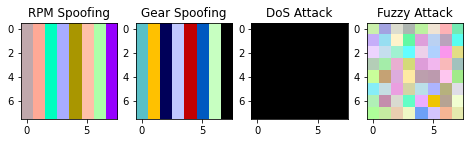

In [13]:
# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('./train/0/24.png')
img2 = Image.open('./train/1/24.png')
img3 = Image.open('./train/2/24.png')
img4 = Image.open('./train/3/24.png')
# img5 = Image.open('./train/4/27.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("RPM Spoofing")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("Gear Spoofing")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("DoS Attack")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("Fuzzy Attack")
# plt.subplot(1,5,5)
# plt.imshow(img5)
# plt.title("Fuzzy Attack")
plt.show()  # display it

## Split the training and test set 

In [14]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

9325


In [15]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
#         print ("%s not exist!"%(srcfile))
        pass
    else:
        fpath,fname=os.path.split(dstfile)    
        if not os.path.exists(fpath):
            os.makedirs(fpath)               
        shutil.move(srcfile,dstfile)          
        #print ("move %s -> %s"%(srcfile,dstfile))

In [16]:
# The size of test set
Numbers

1865

In [17]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [18]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [19]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [20]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing


In [21]:
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
# from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
# from keras.applications.vgg19 import VGG19
# from keras.applications.resnet50 import  ResNet50
# from keras.applications.inception_v3 import InceptionV3
# from keras.applications.inception_resnet_v2 import InceptionResNetV2
# from keras.applications.mobilenet import MobileNet
import keras.callbacks as kcallbacks
import keras
# from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf
import math
import random
from keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [22]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 7463 images belonging to 4 classes.
Found 1868 images belonging to 4 classes.


In [23]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [24]:
history_this= LossHistory()

In [ ]:
def cnn_by_own(input_shape,num_class,epochs,savepath='./model_own.h5',history=history_this):
    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_loss', patience=0, verbose=1, mode='auto')
    # saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./model/cnn_model_own.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
    hist=model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,model_checkpoint_callback,history],
    )
    return hist

In [ ]:
# cnn_scratch_hist = cnn_by_own(input_shape=INPUT_SIZE,num_class=4,epochs=5)


In [ ]:
# Train and validation accuracy - loss
# plt.figure(figsize=(10,7))
# plt.plot(cnn_scratch_hist.history['accuracy'])
# plt.plot(cnn_scratch_hist.history['val_accuracy'])
# plt.plot(cnn_scratch_hist.history['loss'])
# plt.plot(cnn_scratch_hist.history['val_loss'])
# plt.title('CNN Scratch Model accuracy and Loss')
# plt.ylabel('Accuracy - Loss')
# plt.xlabel('Epoch')
# plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'])
# plt.show()

In [ ]:
# cnn_scratch_hist.history['accuracy']

# VGG16 CNN model

In [31]:
def vgg16( num_class, epochs,history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:15]: #the number of frozen layers for transfer learning, have tuned from 5-18
        layer.trainable = False
    for layer in model_fine_tune.layers[15:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output) #GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='vgg')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)  #tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping( monitor='val_loss', patience=3, verbose=1, mode='auto') #set early stop patience to save training time
    saveBestModel = tf.keras.callbacks.ModelCheckpoint(filepath='./model',save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True, 
        #workers=2,
        callbacks=[earlyStopping, saveBestModel, history],
    )
    model.save('vgg_model.h5')
    return hist


In [32]:
hist =vgg16(num_class=4,epochs=5) #tf36cnn
# history_this.loss_plot('epoch')
# history_this.loss_plot('batch')
# plt.show()

Epoch 1/5


2023-03-28 22:26:27.005592: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1644167168 exceeds 10% of free system memory.
2023-03-28 22:26:28.677452: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1644167168 exceeds 10% of free system memory.
2023-03-28 22:26:37.244812: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 822083584 exceeds 10% of free system memory.
2023-03-28 22:26:40.760330: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 822083584 exceeds 10% of free system memory.


 1/59 [..............................] - ETA: 1:07:31 - loss: 1.4466 - accuracy: 0.2656

2023-03-28 22:27:33.494091: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1644167168 exceeds 10% of free system memory.


59/59 [==============================] - 2627s 44s/step - loss: 0.1389 - accuracy: 0.9496 - val_loss: 0.0470 - val_accuracy: 0.9984
Epoch 2/5
59/59 [==============================] - 2488s 42s/step - loss: 0.0126 - accuracy: 0.9995 - val_loss: 0.0475 - val_accuracy: 0.9984
Epoch 3/5
13/59 [=====>........................] - ETA: 25:12 - loss: 0.0122 - accuracy: 0.9981

KeyboardInterrupt: 

In [ ]:
# from keras.models import load_model
# model = load_model('vgg_model.h5')
# model.summary()

In [ ]:
hist_accuracy = hist.history['accuracy'][-1]
hist_loss = hist.history['loss'][-1]
hist_val_accuracy=  hist.history['val_accuracy'][-1]
hist_val_loss = hist.history['val_loss'][-1]
print("Accucacy:",round((hist_accuracy * 100),2),"%")
print("Loss:",round((hist_loss * 100),2),"%")
print("Val_Accucacy:",round((hist_val_accuracy * 100),2),"%")
print("Val_Loss:",round((hist_val_loss * 100),2),"%")

In [ ]:
# Train and validation accuracy - loss
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('CNN Model accuracy and Loss')
plt.ylabel('Accuracy - Loss')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'])
plt.show()


In [ ]:
training_accuracy_cnn = hist.history['accuracy']
validation_accuracy_cnn = hist.history['val_accuracy']

In [ ]:
print("Training accuracy of the CNN model:", round(training_accuracy_cnn[-1]*100,2), "%")
print("Validation accuracy of the CNN model:", round(validation_accuracy_cnn[-1]*100,2), "%")

# LSTM model

In [ ]:
# def lstm_model( num_class, epochs,history=history_this,input_shape=INPUT_SIZE):
#     # Create the LSTM model
#     model = Sequential()
# #     model.add(Reshape((224, 224 *3), input_shape=(224, 224, 3)))
#     model.add(Embedding(max_features, 32))
#     model.add(LSTM(32))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
#     earlyStopping=kcallbacks.EarlyStopping(monitor='val_loss', patience=0, verbose=1, mode='auto')
#         # saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
#     model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="./model",
#         save_weights_only=True,
#         monitor='val_accuracy',
#         mode='max',
#         save_best_only=True)

#     # Train the model
#     history=model.fit_generator(
#         train_generator,
#         steps_per_epoch=len(train_generator),
#         epochs=epochs,
#         validation_data=validation_generator,
#         validation_steps=len(validation_generator),
#         callbacks=[earlyStopping,model_checkpoint_callback,history_this]
#         )
#     model.save("lstm_model.h5")
#     return history

In [ ]:
# lstm_hist = lstm_model(num_class=4,epochs=10) #tf36cnn

# LSTM model

In [25]:
def lstm_model( num_class, epochs,history=history_this,input_shape=INPUT_SIZE):
    # Create the LSTM model
    model = Sequential()
    model.add(Reshape((224, 224 *3), input_shape=(224, 224, 3)))
    model.add(LSTM(128))
#     model.add(LSTM(64))
    model.add(Dropout(0.2))
    model.add(Dense(num_class, activation='softmax'))
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)  #tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #set the loss function to be binary crossentropy
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
        # saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="./model",
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)

    # Train the model
    history=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,model_checkpoint_callback,history_this]
        )
    model.save("lstm_model.h5")
    return history

In [26]:
lstm_hist = lstm_model(num_class=4,epochs=10) #tf36cnn

2023-03-28 22:14:05.686096: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-28 22:14:05.686145: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (maddy-Lenovo-ideapad-330-15IKB): /proc/driver/nvidia/version does not exist
2023-03-28 22:14:05.687035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
59/59 [==============================] - 71s 1s/step - loss: 0.1998 - accuracy: 0.9715 - val_loss: 0.0146 - val_accuracy: 0.9984
Epoch 2/10
59/59 [==============================] - 59s 996ms/step - loss: 0.0051 - accuracy: 0.9996 - val_loss: 0.0146 - val_accuracy: 0.9984
Epoch 3/10
59/59 [==============================] - 59s 988ms/step - loss: 0.0043 - accuracy: 0.9996 - val_loss: 0.0147 - val_accuracy: 0.9984
Epoch 4/10
59/59 [==============================] - 59s 998ms/step - loss: 0.0042 - accuracy: 0.9996 - val_loss: 0.0152 - val_accuracy: 0.9984
Epoch 5/10
59/59 [==============================] - 60s 1s/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 0.0155 - val_accuracy: 0.9984
Epoch 6/10
59/59 [==============================] - 62s 1s/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 0.0155 - val_accuracy: 0.9984
Epoch 7/10
59/59 [==============================] - 62s 1s/step - loss: 0.0042 - accuracy: 0.9996 - val_loss: 0.0156 - val_accuracy: 0.9984
Epoch 7: ea

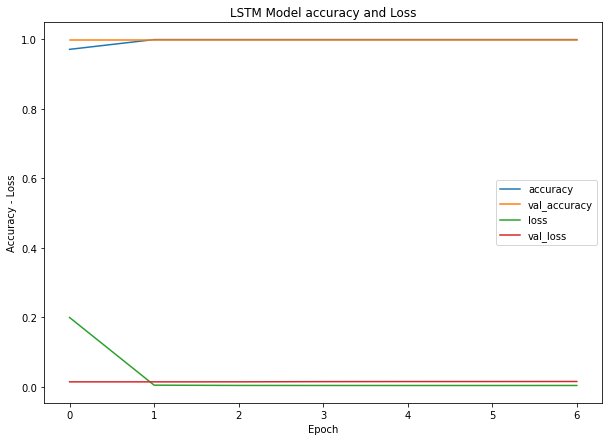

In [27]:
# Train and validation accuracy - loss
plt.figure(figsize=(10,7))
plt.plot(lstm_hist.history['accuracy'])
plt.plot(lstm_hist.history['val_accuracy'])
plt.plot(lstm_hist.history['loss'])
plt.plot(lstm_hist.history['val_loss'])
plt.title('LSTM Model accuracy and Loss')
plt.ylabel('Accuracy - Loss')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'])
plt.show()

In [28]:
lstm_loss = lstm_hist.history['loss']
lstm_val_loss = lstm_hist.history['val_loss']
print("Loss Percentage:",lstm_loss * 100, "%")
print("Validation Loss Percentage:",lstm_val_loss * 100, "%")

In [29]:
training_accuracy_lstm = lstm_hist.history['accuracy']
validation_accuracy_lstm = lstm_hist.history['val_accuracy']

In [30]:
print("Training accuracy of the LSTM model:", round(training_accuracy_lstm[-1]*100,2), "%")
print("Validation accuracy of the LSTM model:", round(validation_accuracy_lstm[-1]*100,2), "%")

Training accuracy of the LSTM model: 99.96 %
Validation accuracy of the LSTM model: 99.84 %


In [ ]:
# dir(lstm_hist)

In [ ]:
# lstm_hist.history

In [ ]:
# hist.history

In [ ]:
lstm_loss = lstm_hist.history['loss']
lstm_acc = lstm_hist.history['accuracy']
cnn_loss = hist.history['loss']
cnn_acc = hist.history['accuracy']

In [ ]:
# plot the loss of both models
plt.plot(lstm_loss, label='LSTM')
plt.plot(cnn_loss, label='CNN')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# plot the accuracy of both models
plt.plot(lstm_acc, label='LSTM')
plt.plot(cnn_acc, label='CNN')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(lstm_hist.history['loss'], label='LSTM Training Loss')
plt.plot(hist.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training accuracy
plt.plot(lstm_hist.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the validation loss
plt.plot(lstm_hist.history['val_loss'], label='LSTM Validation Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the validation accuracy
plt.plot(lstm_hist.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# LSTM + CNN Hybrid model

In [ ]:
from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, Reshape
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Flatten

def cnn_lstm_hybrid_model(num_class, epochs, history=history_this, input_shape=INPUT_SIZE):
    # Define the input layer
    input_layer = Input(shape=input_shape)
    
    # Define the CNN layer
    cnn_layer = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
    cnn_layer = MaxPooling2D(pool_size=(2, 2))(cnn_layer)
    cnn_layer = Conv2D(64, kernel_size=(3, 3), activation='relu')(cnn_layer)
    cnn_layer = Dropout(0.25)(cnn_layer)
    
    # Define the Flatten layer
    flatten_layer = Flatten()(cnn_layer)
    
    # Define the reshape layer
    gap_layer = GlobalAveragePooling2D()(cnn_layer)
    reshape_layer = Reshape((1, 64))(gap_layer)

    # Define the LSTM layer
    lstm_layer = LSTM(64, activation='relu')(reshape_layer)
    lstm_layer = Dropout(0.25)(lstm_layer)
    
    # Define the output layer
    output_layer = Dense(num_class, activation='softmax')(lstm_layer)
    
    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Define the early stopping and model checkpoint callbacks
    early_stopping =kcallbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="./model", save_weights_only=True,
                                       monitor='val_accuracy', mode='max', save_best_only=True)
    
    # Train the model
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping, model_checkpoint, history]
    )

    model.save("cnn_lstm_hybrid_final_model.h5")
    return history


In [ ]:
hybrid_history = cnn_lstm_hybrid_model(num_class=4,epochs=25) #tf36cnn

In [ ]:
hybrid_accuracy = hybrid_history.history['accuracy'][-1]
hybrid_loss = hybrid_history.history['loss'][-1]
hybrid_val_accuracy=  hybrid_history.history['val_accuracy'][-1]
hybrid_val_loss = hybrid_history.history['val_loss'][-1]
print("Accucacy:",round((hybrid_accuracy * 100),2),"%")
print("Loss:",round((hybrid_loss * 100),2),"%")
print("Val_Accucacy:",round((hybrid_val_accuracy * 100),2),"%")
print("Val_Loss:",round((hybrid_val_loss * 100),2),"%")

In [ ]:
# Train and validation accuracy - loss
plt.figure(figsize=(12,8))
plt.plot(hybrid_history.history['accuracy'])
plt.plot(hybrid_history.history['val_accuracy'])
plt.plot(hybrid_history.history['loss'])
plt.plot(hybrid_history.history['val_loss'])
plt.title('CNN+LSTM HYbrid Model accuracy and Loss')
plt.ylabel('Accuracy - Loss')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(lstm_hist.history['loss'], label='LSTM Training Loss')
plt.plot(hist.history['loss'], label='CNN Training Loss')
plt.plot(hybrid_history.history['loss'], label='Hybrid Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training accuracy
plt.plot(lstm_hist.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(hist.history['accuracy'], label='CNN Training Accuracy')
plt.plot(hybrid_history.history['accuracy'], label='Hybrid Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the validation loss
plt.plot(lstm_hist.history['val_loss'], label='LSTM Validation Loss')
plt.plot(hist.history['val_loss'], label='CNN Validation Loss')
plt.plot(hybrid_history.history['val_loss'], label='Hybrid Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the validation accuracy
plt.plot(lstm_hist.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(hist.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(hybrid_history.history['val_accuracy'], label='Hybrid Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# Sample detection rates for each class
class_0 = [0.75, 0.82, 0.68, 0.79, 0.89]
class_1 = [0.62, 0.55, 0.68, 0.72, 0.58                  ]
class_2 = [0.90, 0.88, 0.95, 0.92, 0.93]
data = {'class1':class_0, 'class2':class_1, 'class3':class_2}
df = pd.DataFrame(data)
sns.boxplot(data=df)
plt.title("Box Plot for the detection rate using LSTM ")
plt.show()


In [ ]:
# Sample detection rates for each class
class_0 = [.1,1,1,.21,1,1,.91]
class_1 = [1.5,1,1,1,.51,1,1]
class_2 = [1,1.6,1,0.01,1,11,1]
data = {'A':class_0, 'B':class_1, 'C':class_2}
dff = pd.DataFrame(data)
sns.boxplot(data=dff)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
class_0 = [0.75, 0.82, 0.68, 0.79, 0.89]
class_1 = [0.62, 0.55, 0.68, 0.72, 0.58]
class_2 = [0.90, 0.88, 0.95, 0.92, 0.93]
epochs = [1, 2, 3, 4, 5]
plt.plot(epochs, class_0, label='class_0')
plt.plot(epochs, class_1, label='class_1')
plt.plot(epochs, class_2, label='class_2')

plt.xlabel('Epochs')
plt.ylabel('Detection Rate')
plt.title("Detection rate vs Epochs of LSTM model")
plt.legend()
plt.show()